In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import scipy.optimize as opt
from matplotlib.colors import LogNorm

def conf_interval(x, pdf, conf_level):
    return np.sum(pdf[pdf > x])-conf_level

def plot_2d_dist(x,y, xlim, ylim, nxbins, nybins, figsize=(5,5), 
                cmin=1.e-4, cmax=1.0, smooth=None, xpmax=None, ypmax=None, 
                log=False, weights=None, xlabel='x', ylabel='y', 
                clevs=None, fig_setup=None, savefig=None):
    """
    construct and plot a binned, 2d distribution in the x-y plane 
    using nxbins and nybins in x- and y- direction, respectively
    
    log = specifies whether logged quantities are passed to be plotted on log-scale outside this routine
    """
    if fig_setup is None:
        fig, ax = plt.subplots(figsize=figsize)
        plt.ylabel(ylabel)
        plt.xlabel(xlabel)
        plt.xlim(xlim[0], xlim[1])
        plt.ylim(ylim[0], ylim[1])
    else:
        ax = fig_setup
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_xlim(xlim); ax.set_ylim(ylim)

    if xlim[1] < 0.: ax.invert_xaxis()

    if weights is None: weights = np.ones_like(x)
    H, xbins, ybins = np.histogram2d(x, y, weights=weights, bins=(np.linspace(xlim[0], xlim[1], nxbins),np.linspace(ylim[0], ylim[1], nybins)))
    
    H = np.rot90(H); H = np.flipud(H); 
             
    X,Y = np.meshgrid(xbins[:-1],ybins[:-1]) 

    if smooth != None:
        from scipy.signal import wiener
        H = wiener(H, mysize=smooth)
        
    H = H/np.sum(H)        
    Hmask = np.ma.masked_where(H==0,H)
    
    if log:
        X = np.power(10.,X); Y = np.power(10.,Y)

    pcol = ax.pcolormesh(X, Y,(Hmask),  cmap=plt.cm.BuPu, norm = LogNorm(), linewidth=0., rasterized=True)
    pcol.set_edgecolor('face')
    
    # plot contours if contour levels are specified in clevs 
    if clevs is not None:
        lvls = []
        for cld in clevs:  
            sig = opt.brentq( conf_interval, 0., 1., args=(H,cld) )   
            lvls.append(sig)
        
        ax.contour(X, Y, H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = sorted(lvls), 
                norm = LogNorm(), extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]])
    if xpmax is not None:
        ax.scatter(xpmax, ypmax, marker='x', c='orangered', s=20)
    if savefig:
        plt.savefig(savefig,bbox_inches='tight')
    if fig_setup is None:
        plt.show()
    return

2.1659043831815943 5.570026150429602
0.0092220466255114 3.2898834191312014
1.8395276841505317 6.270251700691382
3.1716003505368935 0.19098139037770995 3.1451274985797544


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: UserWarning: Log scale: values of z <= 0 have been masked


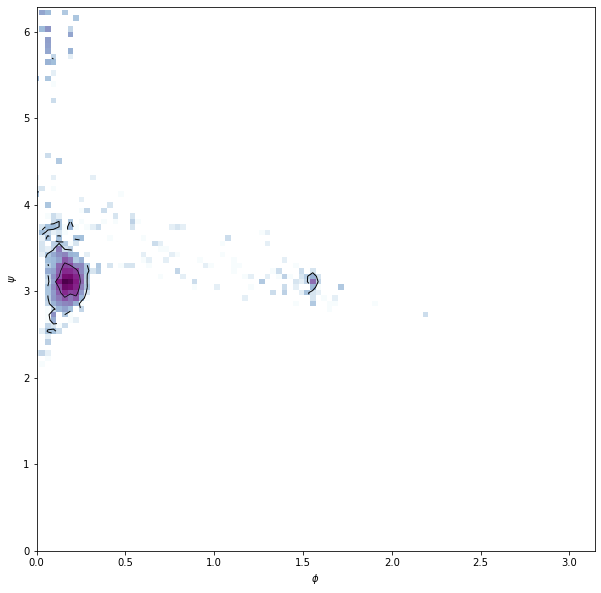

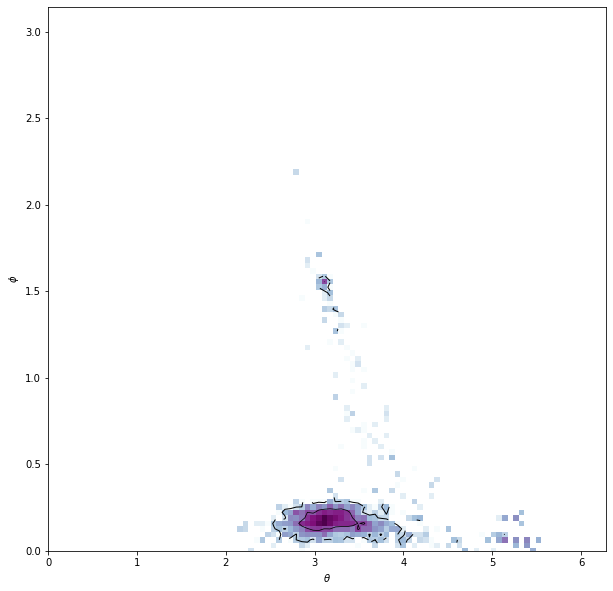

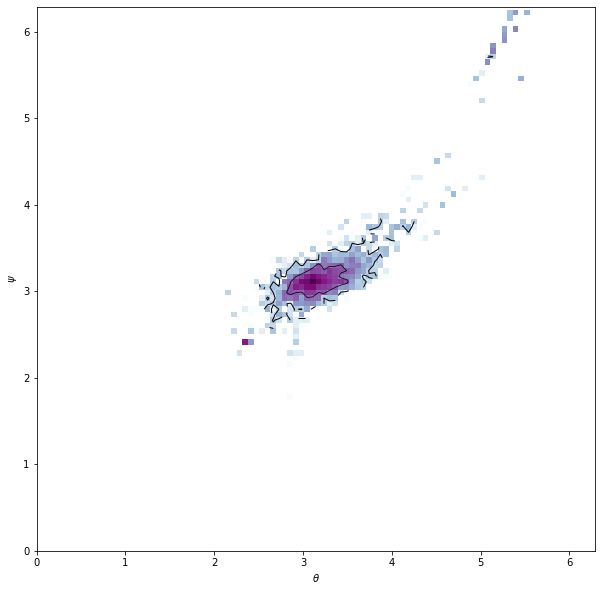

In [24]:
chain=pd.read_csv("MCMCOutput.csv")
theta=chain['Theta']
phi=chain['Phi']
psi=chain['Psi']

print(np.min(theta),np.max(theta))
print(np.min(phi),np.max(phi))
print(np.min(psi),np.max(psi))
print(np.median(theta),np.median(phi),np.median(psi))

conflevs = [0.6827, 0.9545]
plot_2d_dist(phi,psi, xlim=[0,np.pi], ylim =[0,2*np.pi], 
             nxbins=100, nybins=100, 
             clevs=conflevs,
             xlabel=r'$\phi$', 
             ylabel=r'$\psi$', figsize=(10,10))

plot_2d_dist(theta,phi, xlim=[0,2*np.pi], ylim =[0,np.pi], 
             nxbins=100, nybins=100, 
             clevs=conflevs,
             xlabel=r'$\theta$', 
             ylabel=r'$\phi$', figsize=(10,10))

plot_2d_dist(theta,psi, xlim=[0,2*np.pi], ylim =[0,2*np.pi], 
             nxbins=100, nybins=100, 
             clevs=conflevs,
             xlabel=r'$\theta$', 
             ylabel=r'$\psi$', figsize=(10,10))